### Setup cell for Colab

In [2]:
!nvidia-smi
!pip install tensorflow-text
import os 
from google.colab import drive
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive/names_dataset/")

Thu Dec  8 15:30:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Run from here for Local

In [3]:
import tensorflow as tf
print(tf.test.gpu_device_name())
import pandas as pd

df = pd.read_csv('dataset/Arabic_names.csv')

/device:GPU:0


In [ ]:
import random


all_letters_sen = "أبجد هوز حطي كلمن سعفص قرشت ثخذ ضظغ"
y = []
for e in all_letters_sen:
	if e != ' ':
		y.append(e)
garbage_letters = y + ["~", "`", "!", "@", "#", "$", "%", "^", "&", "*", "(", ")", "-", "_", "+", "=", "{", "}", "[", "]", "|", "/", "\", \":", ";", '"', "`", "<", ">", ",", ".", "?", " "]


female_list = list(df.loc[0:551, "Name"])
male_list = list(df.loc[552:1404, "Name"])


def falsify_second_name(first_name):
	n2, n3 = random.choice(female_list), random.choice(male_list)
	return first_name + ' ' + n2 + ' ' + n3
def falsify_third_name(first_name):
	n2, n3 = random.choice(male_list), random.choice(female_list)
	return first_name + ' ' + n2 + ' ' + n3
def falsify_both_name(first_name):
	n2, n3 = random.choice(female_list), random.choice(female_list)
	return first_name + ' ' + n2 + ' ' + n3

def garbage_second_name(first_name):
	n2, n3 = random.choice(male_list), random.choice(male_list)
	#replace random letter in word with random letter in garabage letters
	n2 = n2.replace(random.choice(n2), random.choice(garbage_letters)) 
	return first_name + ' ' + n2 + ' ' + n3
def garbage_third_name(first_name):
	
	n2, n3 = random.choice(male_list), random.choice(male_list)
	#replace random letter in word with random letter in garabage letters
	n3 = n3.replace(random.choice(n3), random.choice(garbage_letters)) 
	return first_name + ' ' + n2 + ' ' + n3

def more_garbage_seq(first_name):
	n2, n3 = random.choice(male_list), random.choice(male_list)

	index_letters_n2 = [i for i in range(len(n2))]
	index_letters_n3 = [i for i in range(len(n3))]

	start_index_n2 = random.choice(index_letters_n2[:-1])
	end_index_n2 = random.choice(index_letters_n2[start_index_n2+1:])

	start_index_n3 = random.choice(index_letters_n3[:-1])
	end_index_n3 = random.choice(index_letters_n3[start_index_n3+1:])

	#replace random letter in word with random letter in garabage letters
	for i in range(start_index_n2, end_index_n2+1): 
		n2 = n2.replace(n2[i], random.choice(garbage_letters)) 
	for i in range(start_index_n3, end_index_n3+1): 
		n3 = n3.replace(n3[i], random.choice(garbage_letters)) 
	return first_name + ' ' + n2 + ' ' + n3

def more_garbage_var(first_name):
	n2, n3 = random.choice(male_list), random.choice(male_list)

	index_letters_n1 = [i for i in range(len(first_name))]
	index_letters_n2 = [i for i in range(len(n2))]
	index_letters_n3 = [i for i in range(len(n3))]

	start_index_n1 = random.choice(index_letters_n1[:-1])
	end_index_n1 = random.choice(index_letters_n1[start_index_n1+1:])

	start_index_n2 = random.choice(index_letters_n2[:-1])
	end_index_n2 = random.choice(index_letters_n2[start_index_n2+1:])

	start_index_n3 = random.choice(index_letters_n3[:-1])
	end_index_n3 = random.choice(index_letters_n3[start_index_n3+1:])

	#replace random letter in word with random letter in garabage letters
	for i in range(start_index_n1, end_index_n1+1): 
		first_name = first_name.replace(random.choice(first_name), random.choice(garbage_letters)) 
	for i in range(start_index_n2, end_index_n2+1): 
		n2 = n2.replace(random.choice(n2), random.choice(garbage_letters)) 
	for i in range(start_index_n3, end_index_n3+1): 
		n3 = n3.replace(random.choice(n3), random.choice(garbage_letters)) 
	return first_name + ' ' + n2 + ' ' + n3


random_ops_dict = {
	0 : garbage_second_name,
	1 : garbage_third_name
}

more_random_ops_dict = {
	0: more_garbage_seq,
	1: more_garbage_var
}

more_random_var_dict = {
	0: falsify_second_name,
	1: falsify_third_name,
	2: falsify_both_name
}

In [ ]:

real_female_data = []
real_male_data = []
for i in range(1): 
	for f in female_list: 
		second_name, third_name = random.choice(male_list), random.choice(male_list)
		fullname = f + ' ' + second_name + ' ' + third_name
		real_female_data.append((fullname, 1))
	for m in male_list:
		second_name, third_name = random.choice(male_list), random.choice(male_list)
		fullname = m + ' ' + second_name + ' ' + third_name
		real_male_data.append((fullname, 1))
		
real_data = real_male_data + real_female_data
real_data_df = pd.DataFrame(real_data, columns =['Name', 'label'])
real_data_df.to_csv('./dataset/real_data_3.csv', index=False)

### Generate Random Data method 1

In [ ]:
fake_female_data = []
fake_male_data = []

for i in range(3):
	for i, f in enumerate(female_list):
		rand_case = random.randint(0,1)
		fullname = random_ops_dict[rand_case](f)
		fake_female_data.append((fullname, 0))

	for i, f in enumerate(male_list):
		rand_case = random.randint(0,1)
		fullname = random_ops_dict[rand_case](f)
		fake_male_data.append((fullname, 0))

fake_data = fake_female_data + fake_male_data
fake_data_df = pd.DataFrame(fake_data, columns =['Name', 'label'])
fake_data_df.to_csv('./dataset/fake_data_1.csv', index=False)

### Generate Random Data method 2

In [ ]:
fake_female_data2 = []
fake_male_data2 = []
for i in range(3):
	for i, f in enumerate(female_list):
		rand_case = random.randint(0,1)
		fullname = more_random_ops_dict[rand_case](f)
		fake_female_data2.append((fullname, 0))
	for i, f in enumerate(male_list):
		rand_case = random.randint(0,1)
		fullname = more_random_ops_dict[rand_case](f)
		fake_male_data2.append((fullname, 0))

fake_data = fake_female_data2 + fake_male_data2
fake_data_df = pd.DataFrame(fake_data, columns =['Name', 'label'])
fake_data_df.to_csv('./dataset/fake_data_2.csv', index=False)

### Generate Random Data method 3

In [ ]:
fake_female_data3 = []
fake_male_data3 = []

for i in range(6):
	for i, f in enumerate(female_list):
		rand_case = random.randint(0, 2)
		fullname = more_random_var_dict[rand_case](f)
		fake_female_data3.append((fullname, 0))
	for i, f in enumerate(male_list):
		rand_case = random.randint(0,2)
		fullname = more_random_var_dict[rand_case](f)
		fake_male_data3.append((fullname, 0))

fake_data = fake_female_data3 + fake_male_data3
fake_data_df = pd.DataFrame(fake_data, columns =['Name', 'label'])
fake_data_df.to_csv('./dataset/fake_data_4.csv', index=False)

# fake_data = fake_female_data + fake_male_data + fake_female_data2 + fake_male_data2 + fake_female_data3 + fake_male_data3
# fake_data_df = pd.DataFrame(fake_data, columns =['Name', 'label'])


# df_fake = pd.read_csv('./dataset/fake_data.csv')
# df_fake_2 = fake_female_data3 + fake_male_data3
# fake_data_df = pd.DataFrame(df_fake_2, columns =['Name', 'label'])
# df_fake_df = pd.concat([df_fake, fake_data_df])


# fake_data_df.to_csv('./dataset/fake_data.csv', index=False)

# df_fake_df.to_csv('./dataset/fake_data.csv', index=False)

### Saving Dataset

In [ ]:
fake_data = fake_female_data + fake_male_data
real_data = real_male_data + real_female_data
fake_data_df = pd.DataFrame(fake_data, columns =['Name', 'label'])
real_data_df = pd.DataFrame(real_data, columns =['Name', 'label'])

In [ ]:
fake_data_df.to_csv('./dataset/fake_data.csv')
real_data_df.to_csv('./dataset/real_data.csv')

NameError: ignored

## Training Phase

In [32]:
import pandas as pd

# df_fake = pd.read_csv('./dataset/fake_data.csv')
# df_real = pd.read_csv('./dataset/real_data.csv')

# df_fake = pd.read_csv('./dataset/fake_data_1.csv')
# df_real = pd.read_csv('./dataset/real_data_1.csv')

# df_fake = pd.read_csv('./dataset/fake_data_2.csv')
# df_real = pd.read_csv('./dataset/real_data_2.csv')

# df_fake = pd.read_csv('./dataset/fake_data_3.csv')
# df_real = pd.read_csv('./dataset/real_data_3.csv')

df_fake = pd.read_csv('./dataset/fake_data_4.csv')
df_real = pd.read_csv('./dataset/real_data_3.csv')


# df_fake_cleaned = df_fake.drop(['Unnamed: 0'], axis=1)
# df_real_cleaned = df_real.drop(['Unnamed: 0'], axis=1)

# df = pd.concat([df_real_cleaned, df_fake_cleaned])

df = pd.concat([df_real, df_fake])


In [33]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

num_classes = 2
y = tf.keras.utils.to_categorical(df["label"].values, num_classes=num_classes)

x_train, x_test, y_train, y_test = train_test_split(df['Name'], y, test_size=0.25)
# x_train, x_test, y_train, y_test = train_test_split(df['Name'], df['label'], test_size=0.25)

In [7]:
import tensorflow_hub as hub
import tensorflow_text as text

preprocessor = hub.KerasLayer( "https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")
encoder = hub.KerasLayer( "https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1")




In [8]:
from keras import backend as K


def balanced_recall(y_true, y_pred):
    """This function calculates the balanced recall metric
    recall = TP / (TP + FN)
    """
    recall_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(
            K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]


def balanced_precision(y_true, y_pred):
    """This function calculates the balanced precision metric
    precision = TP / (TP + FP)
    """
    precision_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(
            K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
    # return average balanced metric for each class
    return precision_by_class / y_pred.shape[1]


def balanced_f1_score(y_true, y_pred):
    """This function calculates the F1 score metric"""
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


In [9]:
i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
x = preprocessor(i)
x = encoder(x)
x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output'])
# x = tf.keras.layers.Dense(128, activation='relu')(x)
# x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x)

model = tf.keras.Model(i, x)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
from tensorflow import keras
n_epochs = 40

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
      balanced_recall,
      balanced_precision,
      balanced_f1_score
]

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

# opt = keras.optimizers.Adagrad()
# opt = keras.optimizers.SGD()
#categorical_crossentropy
# loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
opt = keras.optimizers.Adam()
model.compile(optimizer = opt,
              loss = "categorical_crossentropy",
              metrics = METRICS)

# model_fit = model.fit(x_train, 
#                       y_train, 
#                       epochs = n_epochs,
#                       validation_data = (x_test, y_test),
#                       callbacks = [earlystop_callback])

In [34]:
model_fit = model.fit(x_train, 
                      y_train, 
                      epochs = n_epochs,
                      validation_data = (x_test, y_test),
                      callbacks = [earlystop_callback])

Epoch 1/40
231/231 [==============================] - 121s 525ms/step - loss: 0.3348 - accuracy: 0.8639 - balanced_recall: 0.5999 - balanced_precision: 0.6782 - balanced_f1_score: 0.6298 - val_loss: 0.3149 - val_accuracy: 0.8691 - val_balanced_recall: 0.6373 - val_balanced_precision: 0.6839 - val_balanced_f1_score: 0.6552
Epoch 2/40
231/231 [==============================] - 119s 516ms/step - loss: 0.3271 - accuracy: 0.8635 - balanced_recall: 0.6001 - balanced_precision: 0.6747 - balanced_f1_score: 0.6287 - val_loss: 0.3106 - val_accuracy: 0.8723 - val_balanced_recall: 0.6038 - val_balanced_precision: 0.7107 - val_balanced_f1_score: 0.6463
Epoch 3/40
231/231 [==============================] - 117s 505ms/step - loss: 0.3268 - accuracy: 0.8671 - balanced_recall: 0.6031 - balanced_precision: 0.6894 - balanced_f1_score: 0.6373 - val_loss: 0.3182 - val_accuracy: 0.8707 - val_balanced_recall: 0.5671 - val_balanced_precision: 0.6579 - val_balanced_f1_score: 0.5997
Epoch 4/40
231/231 [========

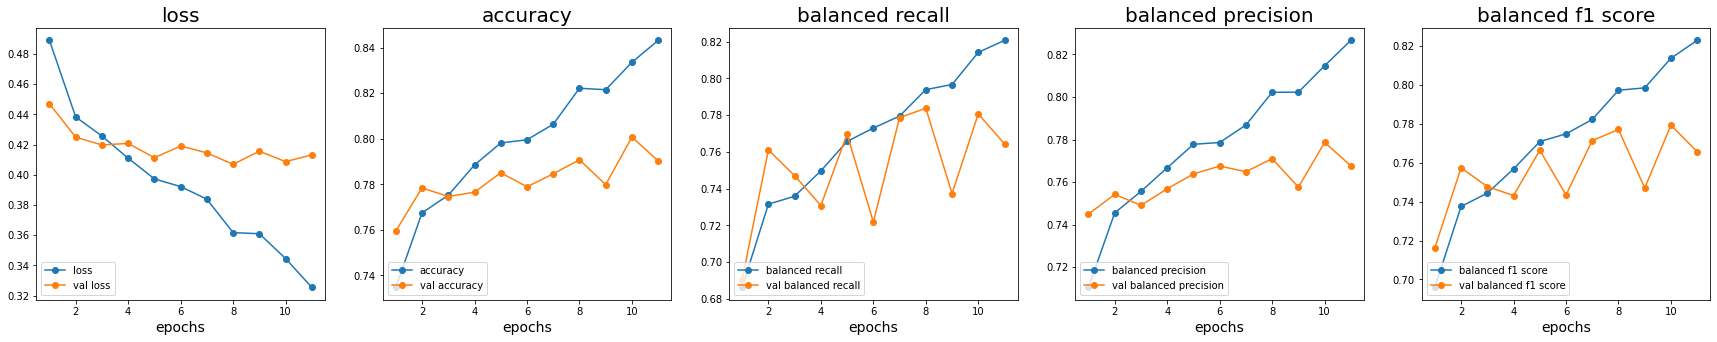

In [44]:
import numpy as np
import matplotlib.pyplot as plt
# x = list(range(1, n_epochs+1))
metric_list = list(model_fit.history.keys())
num_metrics = int(len(metric_list)/2)

fig, ax = plt.subplots(nrows=1, ncols=num_metrics, figsize=(30, 5))

for i in range(0, num_metrics):
  ax[i].plot(x, model_fit.history[metric_list[i]], marker="o", label=metric_list[i].replace("_", " "))
  ax[i].plot(x, model_fit.history[metric_list[i+num_metrics]], marker="o", label=metric_list[i+num_metrics].replace("_", " "))
  ax[i].set_xlabel("epochs",fontsize=14)
  ax[i].set_title(metric_list[i].replace("_", " "),fontsize=20)
  ax[i].legend(loc="lower left")

In [12]:
def predict_class(names):
  '''predict class of input text
  Args:
    - reviews (list of strings)
  Output:
    - class (list of int)
  '''
  return [np.argmax(pred) for pred in model.predict(names)]


In [37]:
# names = [" علميرو ميحميب شيرسيف ", " عمرو محمد شريف "]
# names = [" عللمرو محميب شريف ", " عمرو محمد شريف "]
names = ["عمرو رضوي محمد", "عمرو محمد شريف"]
# names = ["وهب حسين بسمة", "وسيم نهال سامر"]

In [39]:
import numpy as np 
predict_class(names)

1/1 [==============================] - 0s 46ms/step


[0, 1]

In [51]:
new_model = keras.models.load_model("my_model.h5")

ValueError: ignored

In [57]:
new_model = keras.models.load_model("./models/name_classifier_v2", custom_objects={
    'accuracy':tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
    'balanced_recall': balanced_recall,
    'balanced_precision':balanced_precision,
    'balanced_f1_score':balanced_f1_score})